# Trabajo practico final


In [1]:
## Importamos librerias para el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Leemos el dataset en un dataframe
bank = pd.read_csv("bank_subscription.csv")

## Imprimimos cuantas muestras y variables tiene el dataframe
print(bank.shape)

## Imprimimos las primeras 5 filas
bank.head()

(45211, 18)


,Unnamed: 0,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


In [2]:
## Imprimimos informacion general del dataset para ver las columnas, la cantidad de valores no nulos y el tipo de variable
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45211 non-null  int64  
 1   Age                    40238 non-null  float64
 2   Job                    40238 non-null  object 
 3   Marital Status         40238 non-null  object 
 4   Education              40238 non-null  object 
 5   Credit                 40238 non-null  object 
 6   Balance (euros)        40238 non-null  float64
 7   Housing Loan           37525 non-null  object 
 8   Personal Loan          37525 non-null  object 
 9   Contact                45211 non-null  object 
 10  Last Contact Day       45211 non-null  int64  
 11  Last Contact Month     45211 non-null  object 
 12  Last Contact Duration  37525 non-null  float64
 13  Campaign               45211 non-null  int64  
 14  Pdays                  37525 non-null  float64
 15  Pr

In [3]:
bank = bank.drop("Unnamed: 0",axis=1)

In [4]:
## Revisamos el total de valores nulos y que porcentaje del dataset representan
total = bank.isnull().sum().sort_values(ascending=False)
percent = (bank.isnull().sum()/bank.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Pdays,7686,0.170003
Housing Loan,7686,0.170003
Personal Loan,7686,0.170003
Last Contact Duration,7686,0.170003
Age,4973,0.109995
Marital Status,4973,0.109995
Education,4973,0.109995
Credit,4973,0.109995
Balance (euros),4973,0.109995
Job,4973,0.109995


In [5]:
## Cuantas filas tienen al menos un valor nulo?
filas_nan = bank.isnull().any(axis=1).sum()
print(filas_nan)
porcentaje_nan = filas_nan/bank.shape[0]*100
print(porcentaje_nan)

34468
76.23808365220853


### NaNs
Teniendo en cuenta que tenemos un 76% de las filas del dataset con al menos un valor faltante, no podemos eliminar los mismos indiscriminadamente, por lo que haremos algunas asunciones.

- Credit: Todos aquellos valores que sean faltantes seran transformados a "no". La lógica es que si tuvieran un credito en el banco esto se vería reflejado en el dataset
- Balances (euros): Todos aquellos valores que sean faltantes seran transformados a 0. La lógica es que si tuvieran balance en el banco esto se vería reflejado en el dataset
- Housing/personal loan: Todos aquellos valores que sean faltantes seran transformados a "no". La lógica es que si tuvieran un prestamo en el banco esto se vería reflejado en el dataset
- Pdays: Todos aquellos valores que sean faltantes seran transformados a -1. La lógica es que si hubiese habido un contacto se vería reflejado en el dataset.
- Last contact duration: Todos aquellos valores que sean faltantes seran transformados a 0. La lógica es que si hubiese habido un contacto se vería reflejado en el dataset.

Todas las variables mas ajenas al banco como edad, trabajo, estado civil y educación, no las rellenaremos porque significaria introducir mucho ruido en el dataset. Esperamos que con estos reemplazos lleguemos a un numero aceptable de NaNs para eliminar las filas que contengan valores nulos


In [6]:
## Creamos un diccionario con los valores a reemplazar y utilizamos el metodo .fillna() para remplazar valores nulos
values = {"Pdays": -1, "Credit": "no", "Balance (euros)": 0, "Housing Loan": "no", "Personal Loan": "no", "Last Contact Duration": 0}
bank = bank.fillna(value=values)

In [7]:
## Volvemos a revisar cuantas filas tienen valores nulos para analizar si luego de los cambios podemos eliminarlos
filas_nan = bank.isnull().any(axis=1).sum()
print(filas_nan)
porcentaje_nan = filas_nan/bank.shape[0]*100
print(porcentaje_nan)

16830
37.2254539824379


Habiendo disminuido el porcentaje de filas con algún valor nulo de 76% a 37%, contamos con un valor aceptable para poder eliminar aquellas filas con valores NaN.

In [8]:
bank = bank.dropna()
print(bank.shape)

(28381, 17)


In [9]:
## Reemplazamos los valores de 2 y 1 en la variable Subscription para que queden en 1 y 0
bank['Subscription'] = bank['Subscription'].replace(1,0)
bank['Subscription'] = bank['Subscription'].replace(2,1)

In [10]:
## Exportamos el dataset preprocesado para tomarlo en el notebook de ML
bank.to_csv(r'./bank.csv', index=False)

## Analisis exploratorio de datos

## Variables numéricas

In [11]:
display(bank.describe().round(2))

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,28381.00,28381.00,28381.00,28381.00,28381.00,28381.00,28381.00,28381.00
mean,40.88,1213.82,15.79,214.98,2.76,32.82,0.58,0.12
std,10.58,2814.58,8.30,254.33,3.06,92.10,2.49,0.32
min,18.00,-6847.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,33.00,0.00,8.00,58.00,1.00,-1.00,0.00,0.00
50%,39.00,329.00,16.00,147.00,2.00,-1.00,0.00,0.00
75%,48.00,1238.00,21.00,279.00,3.00,-1.00,0.00,0.00
max,93.00,102127.00,31.00,4918.00,58.00,871.00,275.00,1.00


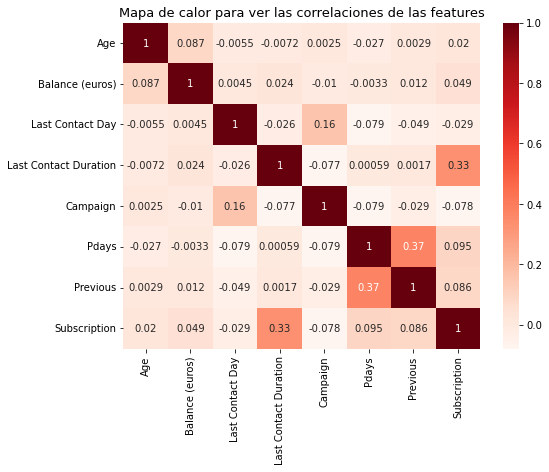

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(bank.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Mapa de calor para ver las correlaciones de las features',
         fontsize=13)
plt.show()

Podemos ver que la variable Last Contact Duration es la que mejor correlaciona con el resultado de la campaña.

### Last Contact Duration

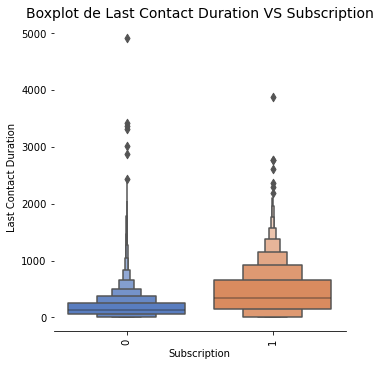

In [13]:
g = sns.catplot(data=bank,
                x="Subscription",y="Last Contact Duration", 
                kind="boxen",
                palette = "muted",
                height = 5 ,aspect=1)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Subscription",size = 10)
plt.ylabel("Last Contact Duration",size = 10)
plt.title('Boxplot de Last Contact Duration VS Subscription',size = 14)
plt.show()

Podemos ver que los clientes que se suscribieron a la campaña suelen tener un último contacto más largo. En cambio, la mayoría de los clientes que no se suscribieron, tuvieron un contacto muy corto, con menos variabilidad entre ellos

Veremos si la cantidad de contactos durante la campaña condiciona a la duración del último contacto.

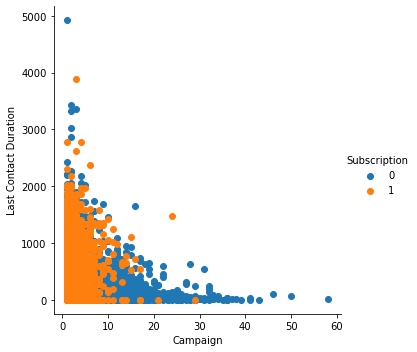

In [14]:
sns.FacetGrid(bank, hue="Subscription", height=5) \
   .map(plt.scatter, "Campaign", "Last Contact Duration") \
   .add_legend()

Podemos ver que conforme avanza la cantidad de contactos, es más difícil lograr un contacto largo. Los usuarios que se suscriben no fueron contactados muchas veces. Es decir, no se justifica insistir en contactar clientes que no aceptaron la campaña en los primeros, por ejemplo, 10 contactos. Se confirma con esto la correlación negativa de las variables Campaign vs. Subscribtion que se puede ver en el heatmap

## Variables categóricas

### Job

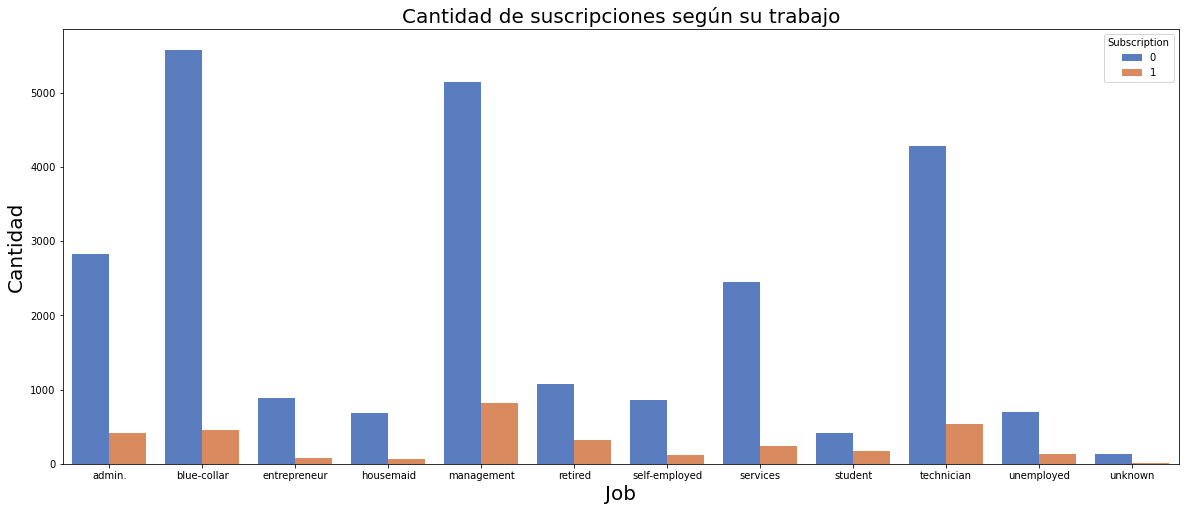

In [15]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=bank,
                  x="Job",
                  hue="Subscription",
                  palette = "muted",
                  order = sorted(bank["Job"].unique())
                 )

plt.title('Cantidad de suscripciones según su trabajo', size = 20)
plt.xlabel("Job", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

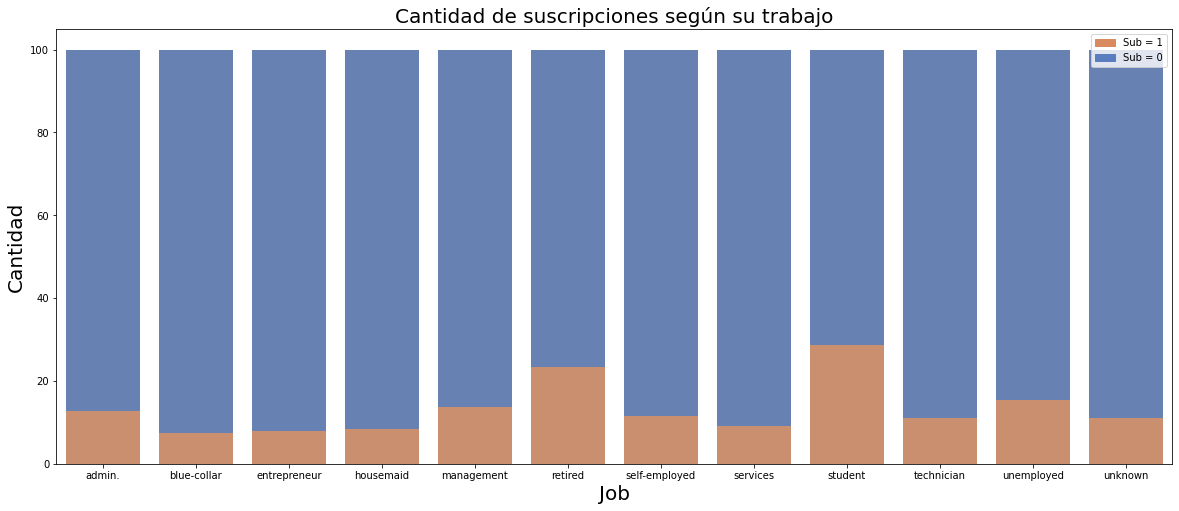

In [16]:
plt.figure(figsize=(20, 8))

# de valor numérico a porcentaje
total = bank.groupby('Job')['Subscription'].count().reset_index()
job = bank[bank.Subscription==1].groupby('Job')['Subscription'].count().reset_index()
job['Subscription'] = [i / j * 100 for i,j in zip(job['Subscription'], total['Subscription'])]
total['Subscription'] = [i / j * 100 for i,j in zip(total['Subscription'], total['Subscription'])]

# grupo de Subscription=1
bar1 = sns.barplot(x="Job",  y="Subscription", data=total, color='#597dbf')

# grupo de Subscription=2
bar2 = sns.barplot(x="Job", y="Subscription", data=job, color='#d98b5f')

# leyendas
top_bar = mpatches.Patch(color='#d98b5f', label='Sub = 1')
bottom_bar = mpatches.Patch(color='#597dbf', label='Sub = 0')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Cantidad de suscripciones según su trabajo', size = 20)
plt.xlabel("Job", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

Se puede ver que las profesiones con más suscripciones son "management" y "technician", mientras que proporcionalmente los estudiantes y retirados son los más propensos a suscribirse

### Marital Status

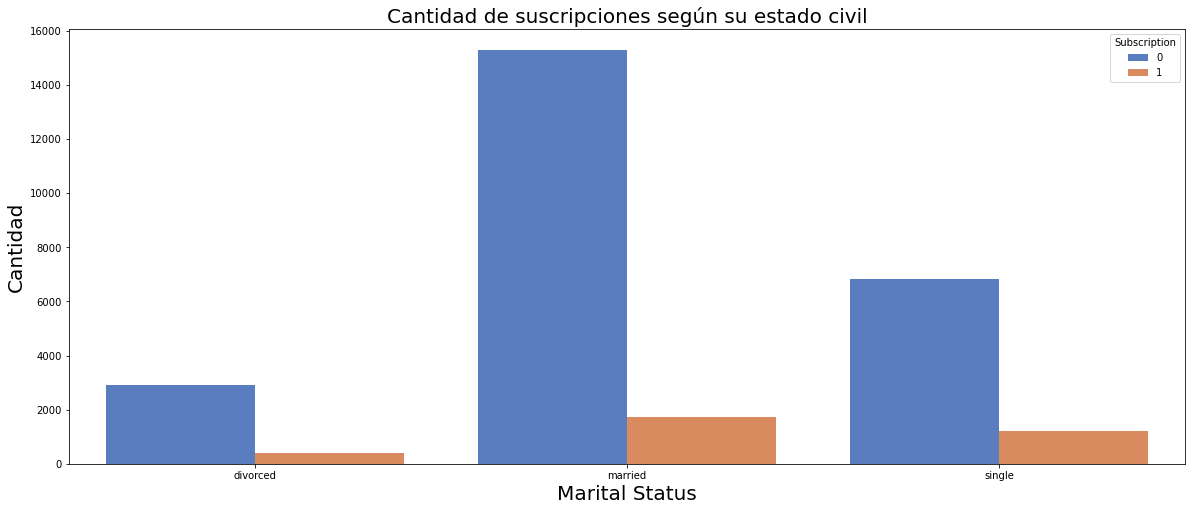

In [17]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=bank,
                  x="Marital Status",
                  hue="Subscription",
                  palette = "muted",
                  order = sorted(bank["Marital Status"].unique())
                 )

plt.title('Cantidad de suscripciones según su estado civil', size = 20)
plt.xlabel("Marital Status", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

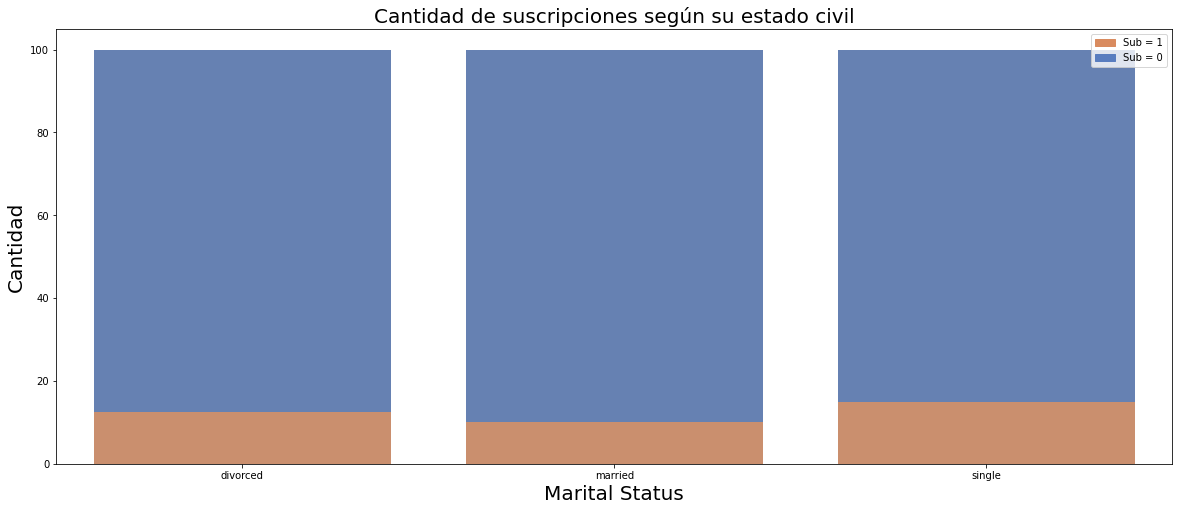

In [18]:
plt.figure(figsize=(20, 8))

# de valor numérico a porcentaje
total = bank.groupby('Marital Status')['Subscription'].count().reset_index()
status = bank[bank.Subscription==1].groupby('Marital Status')['Subscription'].count().reset_index()
status['Subscription'] = [i / j * 100 for i,j in zip(status['Subscription'], total['Subscription'])]
total['Subscription'] = [i / j * 100 for i,j in zip(total['Subscription'], total['Subscription'])]

# grupo de Subscription=1
bar1 = sns.barplot(x="Marital Status",  y="Subscription", data=total, color='#597dbf')

# grupo de Subscription=2
bar2 = sns.barplot(x="Marital Status", y="Subscription", data=status, color='#d98b5f')

# leyendas
top_bar = mpatches.Patch(color='#d98b5f', label='Sub = 1')
bottom_bar = mpatches.Patch(color='#597dbf', label='Sub = 0')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Cantidad de suscripciones según su estado civil', size = 20)
plt.xlabel("Marital Status", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

Se puede ver que el estado civil de las personas no influye significativamente en el resultado de la campaña. Aproximadamente la misma proporción de personas acepta la suscripción en cada categoría.

### Education

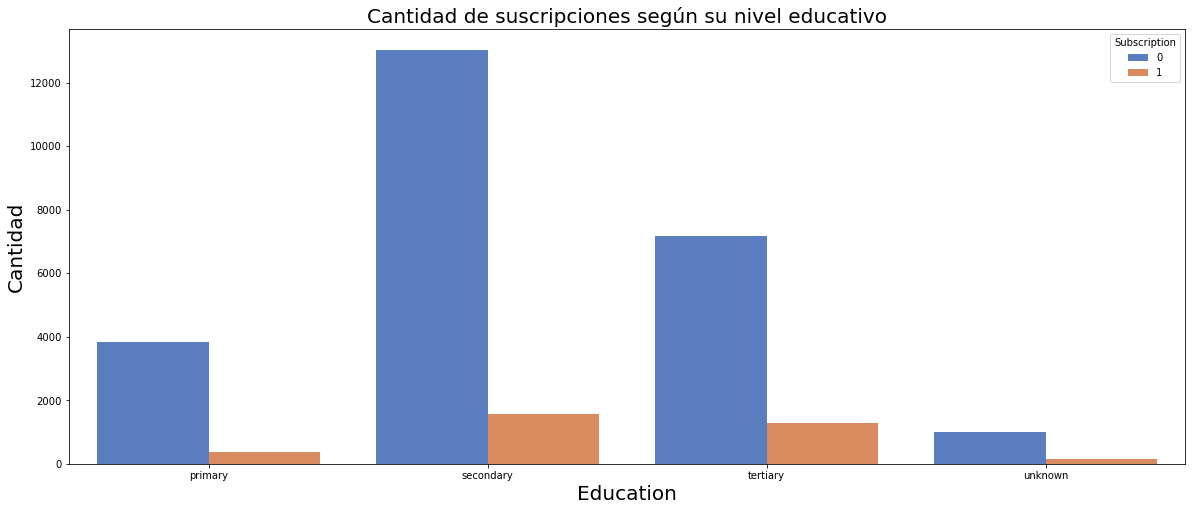

In [19]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=bank,
                  x="Education",
                  hue="Subscription",
                  palette = "muted",
                  order = sorted(bank["Education"].unique())
                 )

plt.title('Cantidad de suscripciones según su nivel educativo', size = 20)
plt.xlabel("Education", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

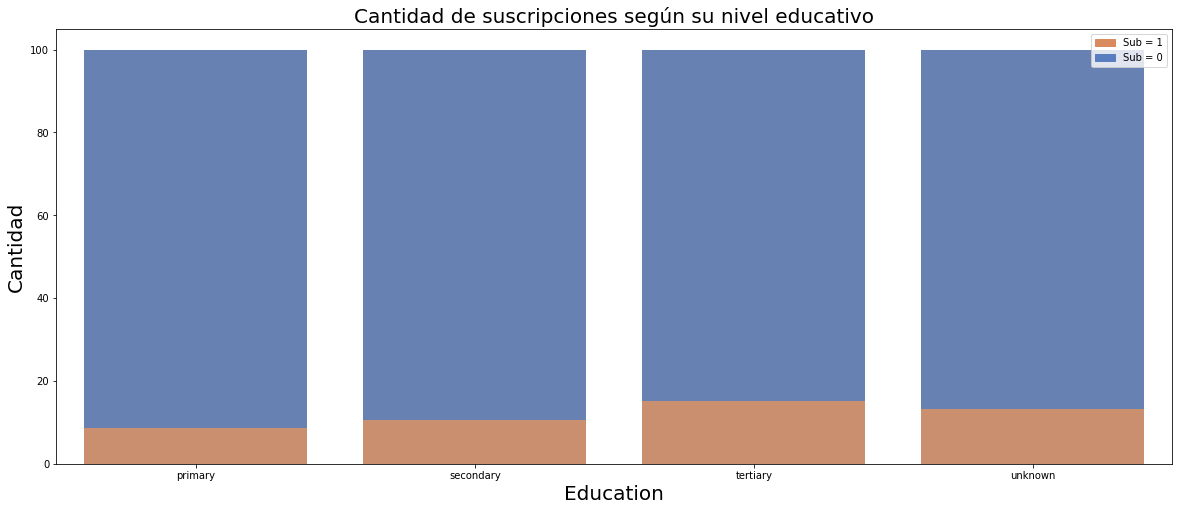

In [20]:
plt.figure(figsize=(20, 8))

# de valor numérico a porcentaje
total = bank.groupby('Education')['Subscription'].count().reset_index()
edu = bank[bank.Subscription==1].groupby('Education')['Subscription'].count().reset_index()
edu['Subscription'] = [i / j * 100 for i,j in zip(edu['Subscription'], total['Subscription'])]
total['Subscription'] = [i / j * 100 for i,j in zip(total['Subscription'], total['Subscription'])]

# grupo de Subscription=1
bar1 = sns.barplot(x="Education",  y="Subscription", data=total, color='#597dbf')

# grupo de Subscription=2
bar2 = sns.barplot(x="Education", y="Subscription", data=edu, color='#d98b5f')

# leyendas
top_bar = mpatches.Patch(color='#d98b5f', label='Sub = 1')
bottom_bar = mpatches.Patch(color='#597dbf', label='Sub = 0')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Cantidad de suscripciones según su nivel educativo', size = 20)
plt.xlabel("Education", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

Se observa una leve mejoría en la respuesta a la campaña a medida que aumenta el nivel educativo de los clientes.

### Poutcome

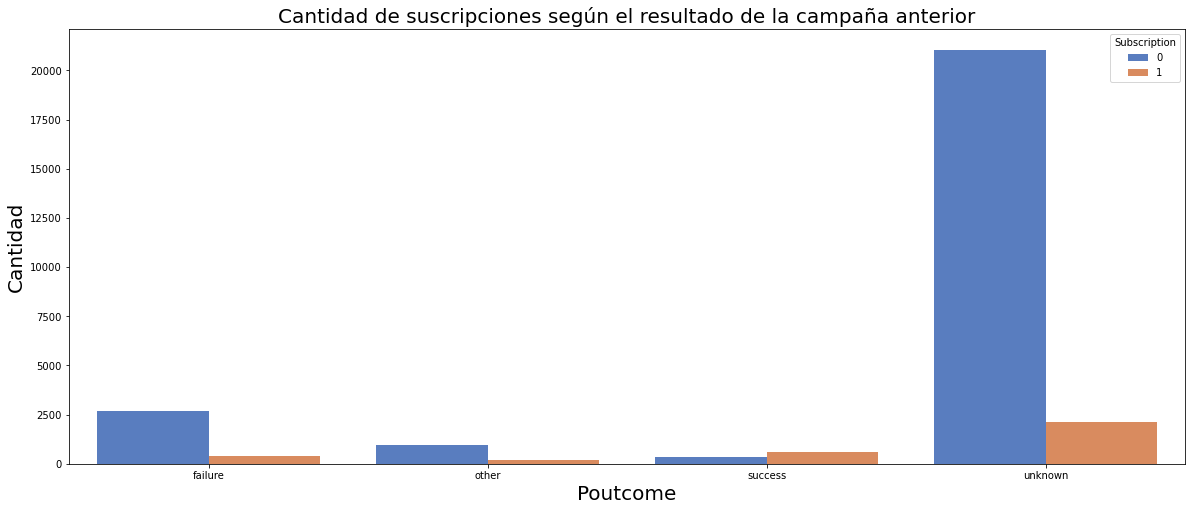

In [21]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=bank,
                  x="Poutcome",
                  hue="Subscription",
                  palette = "muted",
                  order = sorted(bank["Poutcome"].unique())
                 )

plt.title('Cantidad de suscripciones según el resultado de la campaña anterior', size = 20)
plt.xlabel("Poutcome", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

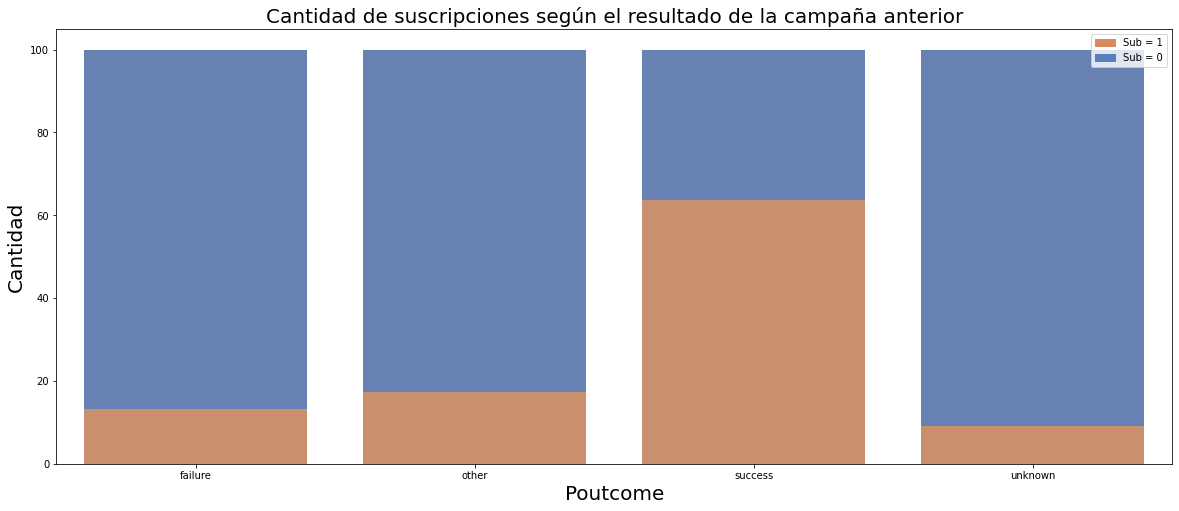

In [22]:
plt.figure(figsize=(20, 8))

# de valor numérico a porcentaje
total = bank.groupby('Poutcome')['Subscription'].count().reset_index()
edu = bank[bank.Subscription==1].groupby('Poutcome')['Subscription'].count().reset_index()
edu['Subscription'] = [i / j * 100 for i,j in zip(edu['Subscription'], total['Subscription'])]
total['Subscription'] = [i / j * 100 for i,j in zip(total['Subscription'], total['Subscription'])]

# grupo de Subscription=1
bar1 = sns.barplot(x="Poutcome",  y="Subscription", data=total, color='#597dbf')

# grupo de Subscription=2
bar2 = sns.barplot(x="Poutcome", y="Subscription", data=edu, color='#d98b5f')

# leyendas
top_bar = mpatches.Patch(color='#d98b5f', label='Sub = 1')
bottom_bar = mpatches.Patch(color='#597dbf', label='Sub = 0')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Cantidad de suscripciones según el resultado de la campaña anterior', size = 20)
plt.xlabel("Poutcome", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

Si bien la mayor cantidad de suscripciones provienen de clientes con resultado desconocido (probablemente porque no fueron objetivo de una campaña anterior), se observa claramente cómo los clientes que ya tuvieron éxito están más predispuestos a volver a aceptar la suscripción

Recomendaciones de negocio:

- La variable que mejor predice la respuesta a la campaña es la duración del ultimo contacto. A medida que aumenta la cantidad de contactos, es menos probable que el cliente se suscriba. Por lo tanto, si no se logra un contacto largo en los primeros intentos, no se justifica seguir insistiendo.
- Si bien los puestos de magagement y technician son los que tienen más suscripciones, la mejor respuesta se observa en personas retiradas y estudiantes. Por lo tanto, si la cartera de clientes no es fija, se debería focalizar la campaña hacia retirados y estudiantes para expandir la base de estos clientes.
- El estado civil y el nivel educativo de los clientes no tienen mucha influencia sobre el resultado
- Los clientes que ya tuvieron un resultado satisfactorio en la campaña anterior, son muy propensos a suscribirse nuevamente